In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataroot = 'C:/Users/MyWork/PycharmProjects/HW56_Color_Models/cat.jpg'
img = cv2.imread(dataroot)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

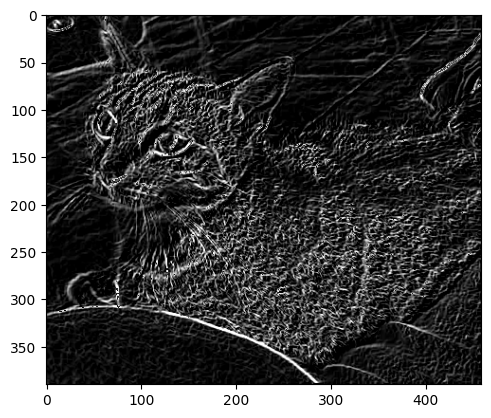

In [3]:
#  Sobel filter, edges

kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

edges_x = cv2.filter2D(gray, -1, kernel_x)
edges_y = cv2.filter2D(gray, -1, kernel_y)
edges_sobel = edges_x + edges_y
    
plt.imshow(edges_sobel, cmap='gray')
plt.show()
    

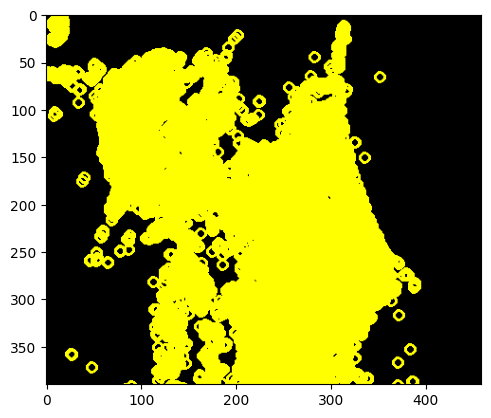

In [4]:
# Huffman, corners after Sobel filter

dst = cv2.cornerMinEigenVal(edges_sobel, 2, 3)
cv2.normalize(dst, dst, 0, 255, cv2.NORM_MINMAX)

treshold = 0.05 * dst.max()
corner_img = np.zeros_like(img)
for i in range(dst.shape[0]):
    for j in range(dst.shape[1]):
        if dst[i,j] > treshold:
            cv2.circle(corner_img, (i,j), 5, (255,255,0), 2)

plt.imshow(corner_img)
plt.show()